In [108]:
import nltk
from nltk.corpus import stopwords
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

plt.style.use(style="seaborn")

In [109]:
df = pd.read_csv(r'data\non-processed\dataset6\Twitter Sentiments.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [110]:
#cleaning tweets
def cleanTweets(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' 
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    
 url = re.compile(r"https?://\S+|www\.\S+") 
 text = url.sub(r"", text) # Removing URls

 stop = set(stopwords.words("english"))
 text = [word.lower() for word in text.split() if word.lower not in stop] # Removing stopwords

 return " ".join(text)

#clean the tweets
df['clean_tweets'] = df['tweet'].apply(cleanTweets)

df

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso cond..."


In [111]:
df['tweet'] = df['tweet'].map(cleanTweets)

In [112]:
df.tweet

0        when a father is dysfunctional and is so selfi...
1        thanks for lyft credit i can't use cause they ...
2                                      bihday your majesty
3        model i love u take with u all the time in urð...
4                       factsguide: society now motivation
                               ...                        
31957    ate isz that youuu?ððððððð...
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    sikh temple vandalised in in calgary, wso cond...
31961                             thank you for you follow
Name: tweet, Length: 31962, dtype: object

In [113]:
#get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)

df

,id,label,tweet,clean_tweets,Subjectivity,Polarity
0,1,0,when a father is dysfunctional and is so selfi...,when a father is dysfunctional and is so selfi...,1.0,-0.500000
1,2,0,thanks for lyft credit i can't use cause they ...,thanks for lyft credit i can't use cause they ...,0.2,0.200000
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000
3,4,0,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,0.6,0.976562
4,5,0,factsguide: society now motivation,factsguide: society now motivation,0.0,0.000000
...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,ate isz that youuu?ððððððð...,0.0,0.000000
31958,31959,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...,0.5,0.400000
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000
31960,31961,1,"sikh temple vandalised in in calgary, wso cond...","sikh temple vandalised in in calgary, wso cond...",0.0,0.000000


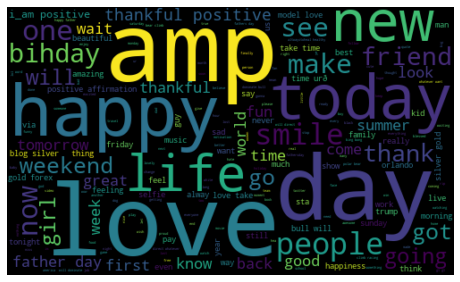

In [114]:
# word visualization
allWords = ' '.join([twts for twts in df['clean_tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [115]:
#function for analysing the data 
def getAnalysis(score):
    if score<0 :
        return 'Negative'
    elif score==0 :
        return 'Neutral'
    else:
        return 'Positive'

In [116]:
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,id,label,tweet,clean_tweets,Subjectivity,Polarity,Analysis
0,1,0,when a father is dysfunctional and is so selfi...,when a father is dysfunctional and is so selfi...,1.0,-0.500000,Negative
1,2,0,thanks for lyft credit i can't use cause they ...,thanks for lyft credit i can't use cause they ...,0.2,0.200000,Positive
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000,Neutral
3,4,0,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,0.6,0.976562,Positive
4,5,0,factsguide: society now motivation,factsguide: society now motivation,0.0,0.000000,Neutral
...,...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,ate isz that youuu?ððððððð...,0.0,0.000000,Neutral
31958,31959,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...,0.5,0.400000,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000,Negative
31960,31961,1,"sikh temple vandalised in in calgary, wso cond...","sikh temple vandalised in in calgary, wso cond...",0.0,0.000000,Neutral


In [117]:
# let's get negative tweets
print('Negative tweets:\n')
k=1
negativeTweets = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, negativeTweets.shape[0]):
  if(negativeTweets['Analysis'][i] == 'Negative'):
    print(str(k) + ' '+negativeTweets['clean_tweets'][i])
    print()
    k=k+1

Negative tweets:

1 when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. run

2 the next school year is the year for exams.ð¯ can't think about that ð­ school exams hate imagine actorslife revolutionschool girl

3 â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may blog silver gold forex

4 we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love

5 sad little dude.. badday coneofshame cats pissed funny laughs

6 it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday

7 it's unbelievable that in the 21st century we'd need something like this. again. neverump xenophobia

8 yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð

9 whenever im and something goes wrong |

10 you've really hu my feelings :(

11 carrying a gun wouldn't of helped if you can't take it

422 a little burst of for you! via

423 girl get fuck leg fucking

424 finally the hour count down til we leave to victoria, b.c. open road &amp; merry travels ð scenery mountains ocean

425 democrat pay has alway been the pay of before it was black inferior to whites. now whites are inferior to everybody

426 . terrible service not how a company conducts itself if it wants respect &amp; disappointed-3rd time u'veâ¦

427 ordered from and the pizza place claimed they never got the order. confused hungry

428 this thread is gold but now i'm im single

429 how far is europe swinging to the right? - nyt libcrib uniteblue fascism trump fear ignorance hate

430 he is nt a man talk less of a boy bt a king! yet u're accusin him of wrong doings by d same culture standards

431 hands down my favorite player to watch! i caught every college game too! when you were sick...i was ...selfishly ð­ð

432 woke up to terrorist attack in orlando and bombing in airpo... wtf has the world become

4

1085 so for season 6 game of thrones!!! yes.. i'm a bit behind.. so no spoilers! getting intense once again!!!!! love got! ð â¤ ð

1086 sad to see what is happening to rayc and chidi benz..... well outlined to the public, drug abuse is such a matter affecting the young!

1087 here's how to combat violent extremism in 2017. "the white nationalist who came to dinner"

1088 like needs to shutup. he just can't bear to see succeed where he failed! soreloser maga

1089 it's the little things that should make us all .... balloon nic joly editions

1090 a repoer tries to understand twitter trial... i wasn't before the trial.

1091 â united states 10-year note auction down to 1.702% from previous 1.71% blog silver gold forex

1092 in nh, some cheer a dangerous caricature of a person using words he doesn't understand to try and capitalize on tragedy for votes

1093 pathetic fallacy? infantile ? just in case anyone wondered whether had a brain we have prooâ¦

1094 pizza ððð + c

1578 because they are just an average team...

1579 sometimes i wonder where have we gone wrong in life as humans . so much hate . lost all humanity . orlandoshooting peace

1580 2of2 needs to know about you being the problem and not the solution for our black community, like mateen.

1581 it was in ceain areas yeah, you not seen the videos? seeing little kids cry didn't do it for me!

1582 an abomination, unfathomable...how one man killed 50and injured 54 orlandoshooting

1583 apparently a nohern ireland fan has died during the match. hope it's not true. xx

1584 orlandoshooting felt bad the way that guy came n staed shooting on e1 thts not humanity nor a pakistani. hu orlandounited

1585 absolutely disgusting

1586 a lot of beauties ððð flowers saturday roses pink yellow

1587 how very sad! greatloss rip ronlester gonetoosoon varsityblues

1588 â czech republic current account (mom): 0.88b (april) vs previous 32.36b blog silver gold forex

1589 defo missing mummy karen mis

2026 lazy day at the beach mood beach sun summer nj seasideâ¦

2027 white girl has sex with black guy nude newzeeland porns

2028 yeah our politicians say that every sunday aswith others round the world, n root us all the rest of the week

2029 "work hard" is bad advice! quick success = inspiration &amp; ez path. get &amp; get lucky! this works loa

2030 how could you all ever lose your faith in me.... pain mistrust relationship outcast twitter life love friendship cruel

2031 " depression: a serious medical condition in which a person feels very " merriam-webster dictionary mood psychologicaldisorder

2032 r u a foodaholic? bt r unable 2 cherish yummy food coz of toothaches? dnt b whn u r hungry! drmitali

2033 pulsenightclub terror attack is officially the worst mass shooting in us history. is not even lose to how iâm fâ¦

2034 awe! blowfly is dead. i just found out.

2035 donât react to anger, respond to it! conflict relationships

2036 porn videos iran fucking girles

2037 th


2548 says aap behind making of 'udta punjab' movie jobs jobsearch : chandigarh: the controversy around cr...

2549 school why u do dis? :( school ugh why no teen girls guys

2550 i need to do mine :(((((((((((

2551 not sure you understand what bigotry is.

2552 why do people always sta sentences with so , its almost as annoying as being tweeted by a ukip follower

2553 that feeling when my hard work pays off is undescribable mondaymotivation goals

2554 halaaaaa.... anyare ke orlando ?! sorry this happened. nagpapakatanga

2555 football then game of thrones! chilleve! !:)

2556 ã life is way too sho to waste it, i say bring on anything ã run sweat cardio â¦

2557 probably in an awful lot of pain. thank you for trying to help.

2558 2016 is still alive ! black man is forced into coffin by white south africans

2559 i fail to understand how, in this day, people can believe that race or sexual orientation can define a person as bad or wrong. smh

2560 world whisky day to three yyc 

3069 //i dont fucking understand why people just deleted their replies to me and stopped sl! i'm too bad for you? say it to me directly!

3070 says the guy voting for a candidate under fbi investigation...bowing down to the clintons.

3071 sad - marrying a palin should be automatic forfeiture of a moh.

3072 why do i always feel so numb, empty and alone? sigh alone lonely depressed numb

3073 prayfororlando lgbt pray equality this is so sad please pray for those ... (vine by edits for realâ¤ï¸)

3074 and if you feel like yo bitch getting fucked , then leave ! ð¯ð¯ national sex day .

3075 the league should allow teams to dock players game checks. no one on gs but steph would be getting a paid for this game.

3076 is that ppl are so spiritually blind so as to not see socialism as coveteous idolatry. ccot

3077 just watched agirllikeher n don't knw what 2 say. wasn't dat bad 4 me but i do knw what it's like 2 b bullied like dat. â¦

3078 sentlel no offence but i find my self very 

3701 seen on my walk the other day! newtotheneighborhood mademesmile

3702 sorry abt that. it's one thing some of us experience daily, esp as far-right politics flourish in europe. pure evil!

3703 lmao both rubio and paul ryan are truly pathetic, condemning trump for months then joining his side

3704 sex postion picture white girl has sex with black guy

3705 why don't you prove you're indian! you are a nasty person to use a lie like that for personal gain

3706 received my first mean comment today, took it hard, someone actually watched my video,thank you,

3707 usually at night when i'm alone...i haven't had a hug in almost two months. needhugs

3708 even in usa being gay is still dangerous prayfororlando whatapity

3709 crooked hillary clinton hates black people hillary clinton black

3710 hard work, giving 100%, things work out. and of course patience!! has an appointment next friday for an agency!

3711 i have never seen a bigger choke job than game 7 of the nba finals by s. cur

4319 feeling like you need something to change? not sure how? i can help! atsopro livelife hypnotherapy fear

4320 â united kingdom total trade balance up to â£-3.294b in april from previous â£-3.83b blog silver gold foâ¦

4321 life brings out the "monkey in me"ðµ crazy crafts spongieacresbedandbreakfastâ¦

4322 let my crazy out way too soon

4323 these clouds look a little @ forge pond park

4324 a girl could really fuck ur head up ð©ð© it's so ðª

4325 today a&amp;e visitbadweatherbadhayfever= bad attacksnebuliser steriods been well for 3 months gutted

4326 soon in egypt segregation poor rich corruption devastation ðð¡

4327 may have a few new stalkers from the social studies dept.loved sharing hyperdocs,gafe,googleclassroom,overwhelmed

4328 facebookmessenger our cat jacky jackjack while we are away on vacation - he's so :( -â¦

4329 cloudlovers attack bull game 3d: do you really think that his head was empty around the city. each side i

4330 when you order a mar

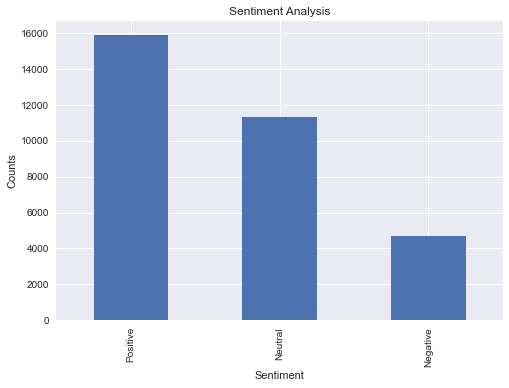

In [118]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [119]:
#Let's check statistics
df['Analysis'].value_counts()

Positive    15881
Neutral     11359
Negative     4722
Name: Analysis, dtype: int64

In [120]:
negTweets = df[df.Analysis == 'Negative']
#negTweets = negTweets['clean_tweets']
#negTweets
negTweets.shape[0] / df.shape[0] * 31962 #accurate number for negative tweets

4722.0

In [121]:
# Creating a mapping in the Counter to count occurances in our corpus
# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [122]:
negTweets.clean_tweets

0        when a father is dysfunctional and is so selfi...
7        the next school year is the year for exams.ð...
10       â ireland consumer price index (mom) climbed...
11       we are so selfish. orlando standwithorlando pu...
21       sad little dude.. badday coneofshame cats piss...
                               ...                        
31917    i feel horrible just watching my brother being...
31918    what the hell is wrong with humanity? why woul...
31923    hea is the easiest thing which can be fooled, ...
31955    less than 2 weeks ð ðð¼ð¹ððµ ibi...
31959    listening to sad songs on a monday morning otw...
Name: clean_tweets, Length: 4722, dtype: object

In [123]:
text = negTweets.clean_tweets

counter = counter_word(text)

In [124]:
len(counter)

15631

In [125]:
counter

Counter({'when': 247,
         'a': 1236,
         'father': 13,
         'is': 881,
         'dysfunctional': 1,
         'and': 951,
         'so': 432,
         'selfish': 5,
         'he': 124,
         'drags': 1,
         'his': 175,
         'kids': 35,
         'into': 45,
         'dysfunction.': 1,
         'run': 18,
         'the': 1853,
         'next': 54,
         'school': 24,
         'year': 31,
         'for': 638,
         'exams.ð\x9f\x98¯': 1,
         "can't": 134,
         'think': 115,
         'about': 183,
         'that': 443,
         'ð\x9f\x98\xad': 11,
         'exams': 5,
         'hate': 191,
         'imagine': 6,
         'actorslife': 1,
         'revolutionschool': 1,
         'girl': 66,
         'â\x86\x9d': 61,
         'ireland': 6,
         'consumer': 4,
         'price': 4,
         'index': 6,
         '(mom)': 4,
         'climbed': 2,
         'from': 182,
         'previous': 35,
         '0.2%': 1,
         'to': 1657,
         '0.5%': 

In [126]:
word_num = len(counter)

#For each sequence we need to have same length when we are doing it with TensorFlow
#mapping them to the same sequence size
max_length = 100

In [127]:
train = negTweets
#Note: another dataset needs to be applied
test = negTweets

train_size = int(train.shape[0] * 0.8)

#train senteces first elements in text feature 
train_sentences = train.clean_tweets[:train_size]
train_labels = train.id[:train_size]

#test senteces are remaining 20%
test_sentences = train.clean_tweets[train_size:]
test_labels = train.id[train_size:]

In [128]:
#Tokenizing train setences
tokenizer = Tokenizer(num_words=word_num)
tokenizer.fit_on_texts(train_sentences)

In [129]:
word_index = tokenizer.word_index

In [130]:
word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'and': 4,
 'i': 5,
 'in': 6,
 'is': 7,
 'of': 8,
 'you': 9,
 'for': 10,
 'my': 11,
 'this': 12,
 'that': 13,
 'so': 14,
 'are': 15,
 'on': 16,
 'be': 17,
 'it': 18,
 'not': 19,
 'amp': 20,
 'with': 21,
 'sad': 22,
 'me': 23,
 'all': 24,
 'just': 25,
 'was': 26,
 'but': 27,
 'at': 28,
 'people': 29,
 "i'm": 30,
 'have': 31,
 'your': 32,
 'when': 33,
 'like': 34,
 'we': 35,
 "it's": 36,
 'no': 37,
 'do': 38,
 'bear': 39,
 'hate': 40,
 'what': 41,
 'they': 42,
 'polar': 43,
 'about': 44,
 'out': 45,
 'game': 46,
 'down': 47,
 'as': 48,
 'how': 49,
 'his': 50,
 'day': 51,
 'now': 52,
 'from': 53,
 'black': 54,
 'by': 55,
 'up': 56,
 'can': 57,
 'will': 58,
 "don't": 59,
 'why': 60,
 'angry': 61,
 'little': 62,
 'an': 63,
 'get': 64,
 'who': 65,
 'orlando': 66,
 'really': 67,
 'bad': 68,
 'â\x80¦': 69,
 'has': 70,
 'climb': 71,
 "can't": 72,
 'racing': 73,
 'life': 74,
 'he': 75,
 '2': 76,
 'one': 77,
 'see': 78,
 'feel': 79,
 'if': 80,
 'time': 81,
 'our': 82

In [131]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
#Let's check the sentence produces by training data
train_sequences[0]

[33, 3, 572, 7, 3980, 4, 7, 14, 823, 75, 3981, 50, 256, 208, 50, 3982, 482]

In [132]:
# pad sequences to specific lenght 
# because of LSTM architecture we need to have same seq. length
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [133]:
train_padded[0]

array([  33,    3,  572,    7, 3980,    4,    7,   14,  823,   75, 3981,
         50,  256,  208,   50, 3982,  482,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [134]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [135]:
print(train.clean_tweets[0])
print(train_sequences[0])

when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. run
[33, 3, 572, 7, 3980, 4, 7, 14, 823, 75, 3981, 50, 256, 208, 50, 3982, 482]


In [136]:
#We are going to use embedded layers and LSTM architecture 
#embedding layer = mapping each word to a vector of a fix sized size with a real value elements
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(word_num, 32, input_length=max_length))
#model.add(layers.LSTM(128))
#model.add(layers.Dense(10))
model.add(tf.keras.layers.LSTM(64, dropout=0.1))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [137]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           500192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 525,089
Trainable params: 525,089
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model.fit(
    train_padded, train_labels, epochs=20, validation_data=(test_padded, test_labels),
)

Epoch 1/20
119/119 [==============================] - 11s 53ms/step - loss: -25260.4414 - accuracy: 2.3174e-04 - val_loss: -271299.0625 - val_accuracy: 0.0000e+00
Epoch 2/20
119/119 [==============================] - 6s 48ms/step - loss: -135296.8569 - accuracy: 3.8480e-04 - val_loss: -387244.5625 - val_accuracy: 0.0000e+00
Epoch 3/20
119/119 [==============================] - 6s 49ms/step - loss: -177757.5138 - accuracy: 5.7894e-05 - val_loss: -470172.9375 - val_accuracy: 0.0000e+00
Epoch 4/20
119/119 [==============================] - 6s 51ms/step - loss: -212212.2729 - accuracy: 3.9444e-04 - val_loss: -545771.8750 - val_accuracy: 0.0000e+00
Epoch 5/20
119/119 [==============================] - 6s 48ms/step - loss: -245807.1163 - accuracy: 3.9444e-04 - val_loss: -617645.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
119/119 [==============================] - 6s 50ms/step - loss: -277938.0115 - accuracy: 1.1166e-04 - val_loss: -687576.8750 - val_accuracy: 0.0000e+00
Epoch 7/20
119/119 [==